# Assignment 1 **<font color="blue"> (15 points )<font>**

------
### Notes and Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. Good luck!  
  

In [2]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## Question 1 <font color="blue">(1 point)</font>

  1. **<font color="blue">(0.5 points)</font>** Write a Python **function** that takes two **positive integers** and returns their **greatest common divisor**. In case you pass a negative integer to the function it must return the following string **in red**: <br> <font color="red"> "This function takes only positive integers!" </font>


In [4]:
# Answer: 1
def gcd(a, b):
    # Check if the input numbers are positive integers
    if a <= 0 or b <= 0:
        return f'"{bcolors.RED}This function takes only positive integers!{bcolors.ENDC}"'
    
    # Euclidean algorithm to find GCD
    while b != 0:
        a, b = b, a % b
    return a

# Example usage
print(gcd(24, 18))  
print(gcd(-24, 18))
print(gcd(-12, -18))

6
"This function takes only positive integers!"
"This function takes only positive integers!"


 2. **<font color="blue">(0.5 points)</font>** Write a function that prints all the prime numbers less than or equal to $n$, where $n$ is a parameter to be passed to the function. If $n \leq 1$ the function returns <br>
<font color="red">"No prime number was found!"</span>.

In [6]:
# Answer: 2
def print_primes(n):
    if n <= 1:
        return f'"{bcolors.RED}No prime number was found!{bcolors.ENDC}"'
    
    primes = []
    for num in range(2, n+1):
        is_prime = True
        for i in range(2, int(num**0.5) + 1):
            if num % i == 0:
                is_prime = False
                break
        if is_prime:
            primes.append(num)
    
    if primes:
        return f"Prime numbers:, {primes}"
    else:
        return "No prime number was found!"

# Example usage:
print(print_primes(9))  
print(print_primes(1))    

Prime numbers:, [2, 3, 5, 7]
"No prime number was found!"


## Question 2 <font color="blue">(6 points)</font>
Let $\mathbf X\sim \mbox{Exp}(\lambda)$, with parameter $\lambda = 1.2$.
  1. **<font color="blue">(0.5 points)</font>** What is the population mean?
  2. **<font color="blue">(1 point)</font>**  Generate $100$ different samples of $\mathbf X$, namely, $S_{100}, S_{200}, S_{300}, \dots, S_{10000}$, where indeces denote the number of observations (sample size) in each sample. 
  3. **<font color="blue">(1.5 points)</font> Estimate** the population mean using each sample and explain the rationale behind your estimation. 
  4. **<font color="blue">(1 point)</font>** Applying **appropriate** methods visualize and describe the values obtained in the previous step. 
  5. **<font color="blue">(2 points)</font>** Finally, draw an inference about the population mean and its relation with sample means, based on visualized results in step 4.

In [8]:
# Answer: 1
from scipy import stats
# Parameter
lambda_val = 1.2

# Calculate the population mean
population_mean = round(1 / lambda_val, 3)
print(population_mean)

# Answer: 2
import numpy as np

# Set the rate parameter λ
lambda_val = 1.2

# Initialize an empty dictionary to store samples
samples = {}

# Generate 100 different samples with increasing sample sizes (100, 200, ..., 10000)
for i in range(1, 101):
    sample_size = i * 100  
    samples[f"S_{sample_size}"] = np.random.exponential(1/lambda_val, sample_size)

0.833


In [9]:
#Answer: 3
# Initialize an empty dictionary to store sample means
sample_means = {}

# Calculate the mean of each sample
for key, sample in samples.items():
    sample_means[key] = np.mean(sample)

# Display the first 5 sample means
for key, mean in list(sample_means.items())[:5]:
    print(f"{key}: Estimated mean = {mean}")

S_100: Estimated mean = 0.7766803764519858
S_200: Estimated mean = 0.9097047277055651
S_300: Estimated mean = 0.8602157330048938
S_400: Estimated mean = 0.8116354296644517
S_500: Estimated mean = 0.8363259917494353


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Sample Size')

Text(0, 0.5, 'Mean Value')

Text(0.5, 1.0, 'Sample Mean vs. Sample Size')

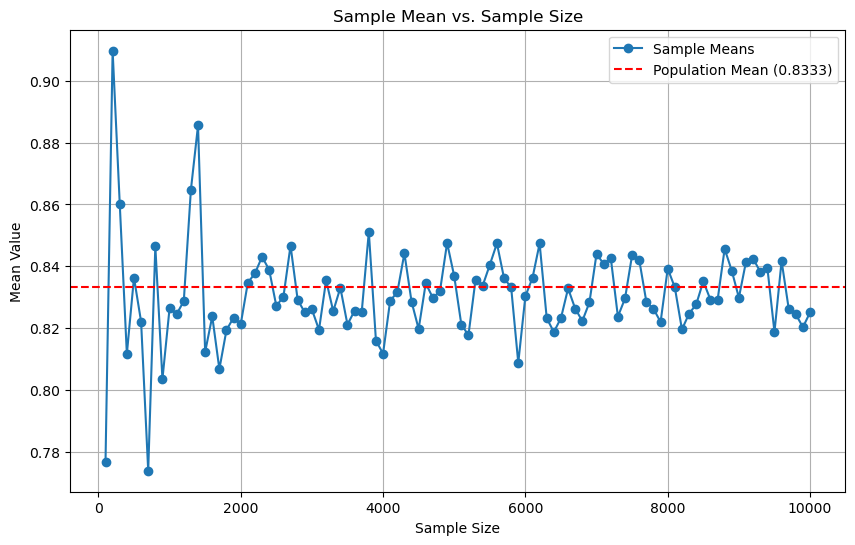

In [10]:
# Answer: 4
import matplotlib.pyplot as plt

# Extract sample sizes and corresponding sample means
sample_sizes = [int(key.split('_')[1]) for key in sample_means.keys()]
mean_values = [value for value in sample_means.values()]

# Plotting the sample means against sample sizes
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, mean_values, label='Sample Means', marker='o')
plt.axhline(y=0.8333, color='r', linestyle='--', label='Population Mean (0.8333)')
plt.xlabel('Sample Size')
plt.ylabel('Mean Value')
plt.title('Sample Mean vs. Sample Size')
plt.legend()
plt.grid(True)
plt.show()

Answer: 5
- As seen in the visualization, for smaller sample sizes (e.g., 100, 200), the sample means can deviate significantly from the population mean of 0.8333. This is expected due to sampling variability.
- However, as the sample size increases (towards 10,000), the sample means get closer to the population mean. This is a result of the Law of Large Numbers, which states that as the sample size increases, the sample mean converges to the population mean.
- We can conclude that for large enough samples, the sample mean provides a good estimate of the population mean.


## Question 3 <font color="blue">(8 points)</font>
In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to fix the seed to $111$ prior to
starting.
  
  1. **<font color="blue">(0.25 points)</font>** Create a vector `x` containing $100$ observations drawn from a $\mathcal{N}(0, 1)$ distribution as your feature. 
  2. **<font color="blue">(0.25 points)</font>** Create a vector, `eps` (for $\epsilon$), containing $100$ observations drawn from a $\mathcal{N}(0, 0.25)$. 
  3. **<font color="blue">(0.5 points)</font>** Using `x` and `eps` generate a vector `y` according to the model $y = −1 + 0.5x + \epsilon$.
  4. **<font color="blue">(0.5 points)</font>** Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.
  5. **<font color="blue">(2 points)</font>** Fit a least squares linear model to predict `y` using `x` . Comment on the model obtained. How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $\beta_0$ and $\beta_1$?
  6. **<font color="blue">(2 point)</font>** Display the least squares line on the scatterplot obtained in part 4. Draw the population regression line on the plot, in a different color. Create an appropriate legend.
  7. **<font color="blue">(2.5 points)</font>** Explain how the result would change if you generate the data with less noise and repeat all steps 1 to 6? What about more noise? 

In [13]:
Answer:1 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set the seed for reproducibility
np.random.seed(111)

# Create a vector x containing 100 observations drawn from a uniform distribution
x = np.random.uniform(0, 1, 100)

# Display the first few values of x
print(f"x values: {x[:5]}")


x values: [0.61217018 0.16906975 0.43605902 0.76926247 0.2953253 ]


In [14]:
Answer: 2 
# Create a vector eps containing 100 observations 
eps = np.random.normal(0, 0.25, 100)

# Display the first few values of eps
print(f"eps values: {eps[:5]}")

eps values: [-0.03946874 -0.09073829  0.06701716  0.15549686  0.05954234]


In [15]:
Answer: 3
# Generate a vector y according to the model y = -1 + 0.5x + eps
y = -1 + 0.5 * x + eps

# Display the first few values of y
print(f"y values: {y[:5]}")

y values: [-0.73338366 -1.00620341 -0.71495333 -0.45987191 -0.79279501]


<Figure size 700x500 with 0 Axes>

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'Scatterplot of x vs. y')

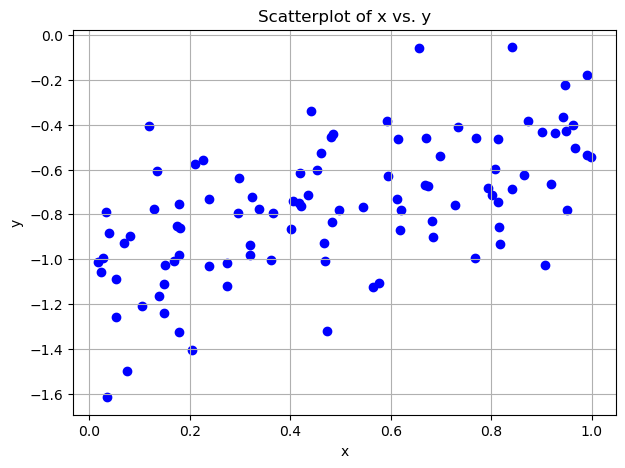

In [16]:
Answer:4 
# Create a scatterplot displaying the relationship between x and y
plt.figure(figsize=(7, 5))
plt.scatter(x, y, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatterplot of x vs. y")
plt.grid(True)
plt.show()

**Observations made from the scatterplot:**
The points generally form a linear pattern, indicating that there is a linear relationship between x and y. However, the data points are not perfectly aligned along a straight line. This is due to the random noise (eps) added to the model.

In [18]:
# Fit a least squares linear model to predict y using x
# Reshape x into a 2D array
x_reshaped = x.reshape(-1, 1)

# Fit the linear model
model = LinearRegression()
model.fit(x_reshaped, y)

# Obtain the model coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Display the fitted model's coefficients
print(f"Fitted model: y = {intercept:.3f} + {slope:.3f} * x")


LinearRegression()

Fitted model: y = -1.054 + 0.583 * x


> $\hat{\beta}_0$ and $\hat{\beta}_1$ values are quite close to the true values of coefficients $\beta_0$ and $\beta_1$. That indicates that the model fits the data well, and estimate accurate representations of the underlying linear relationship.

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'Scatterplot of x vs. y with Fitted and Population Regression Lines')

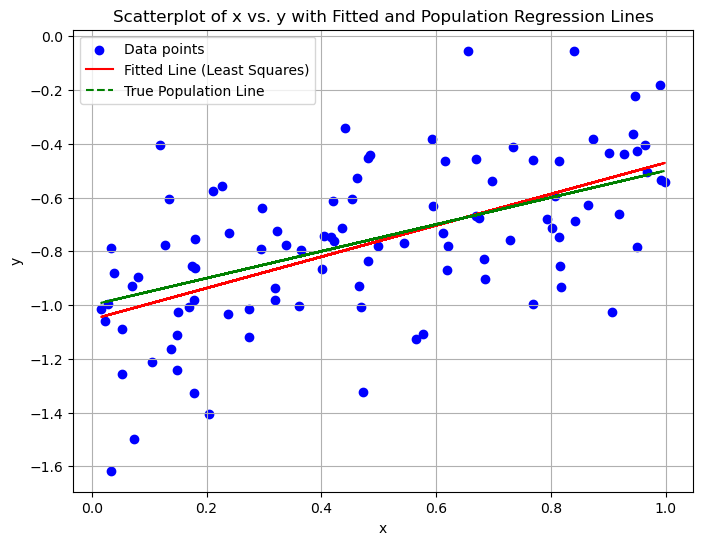

In [20]:
# Plot the fitted line and the true population regression line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')

# Plot the fitted least squares regression line
plt.plot(x, model.predict(x_reshaped), color='red', label='Fitted Line (Least Squares)')

# Plot the true population regression line (y = -1 + 0.5x)
plt.plot(x, -1 + 0.5 * x, color='green', linestyle='--', label='True Population Line')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatterplot of x vs. y with Fitted and Population Regression Lines")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# Answer: 7 
# Generate eps with less noise
eps_less_noise = np.random.normal(0, 0.05, 100)
y_less_noise = -1 + 0.5 * x + eps_less_noise

# Generate eps with more noise
eps_more_noise = np.random.normal(0, 0.2, 100)
y_more_noise = -1 + 0.5 * x + eps_more_noise

<Figure size 700x500 with 0 Axes>

Text(0.5, 0, 'x')

Text(0, 0.5, 'y_less_noise')

Text(0.5, 1.0, 'Scatterplot of x vs. y')

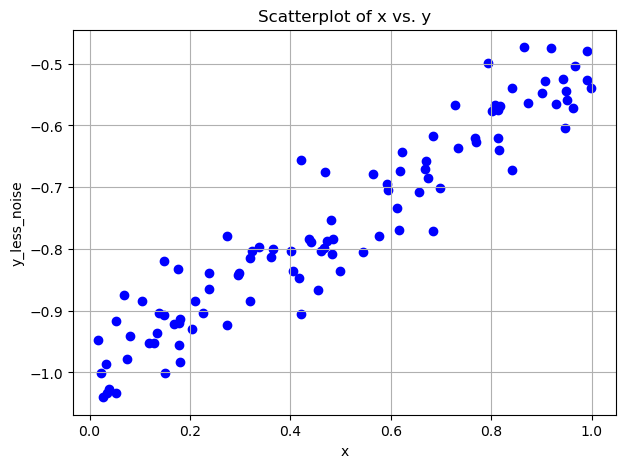

<Figure size 700x500 with 0 Axes>

Text(0.5, 0, 'x')

Text(0, 0.5, 'y_more_noise')

Text(0.5, 1.0, 'Scatterplot of x vs. y')

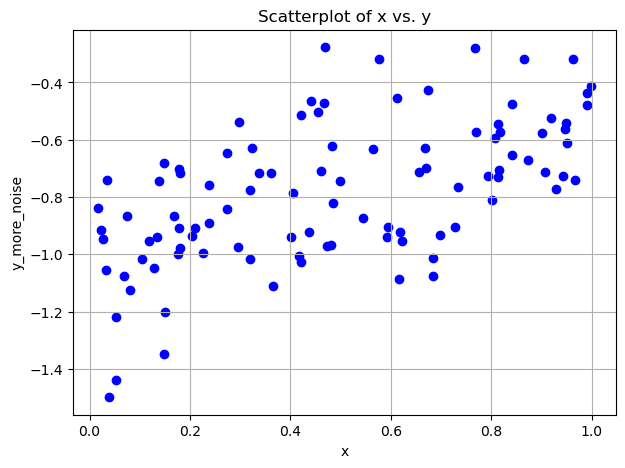

In [22]:
# Create a scatterplot displaying the relationship between x and y
plt.figure(figsize=(7, 5))
plt.scatter(x, y_less_noise, color='blue')
plt.xlabel("x")
plt.ylabel("y_less_noise")
plt.title("Scatterplot of x vs. y")
plt.grid(True)
plt.show()

# Create a scatterplot displaying the relationship between x and y
plt.figure(figsize=(7, 5))
plt.scatter(x, y_more_noise, color='blue')
plt.xlabel("x")
plt.ylabel("y_more_noise")
plt.title("Scatterplot of x vs. y")
plt.grid(True)
plt.show()

In [23]:
# Fit a least squares linear model to predict y using x
# Reshape x into a 2D array
x_reshaped = x.reshape(-1, 1)

# Fit the linear model
model = LinearRegression()
model.fit(x_reshaped, y_less_noise)

# Obtain the model coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Display the fitted model's coefficients
print(f"Fitted model: y = {intercept:.3f} + {slope:.3f} * x")


# Fit a least squares linear model to predict y using x
# Reshape x into a 2D array
x_reshaped = x.reshape(-1, 1)

# Fit the linear model
model = LinearRegression()
model.fit(x_reshaped, y_more_noise)

# Obtain the model coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Display the fitted model's coefficients
print(f"Fitted model: y = {intercept:.3f} + {slope:.3f} * x")

LinearRegression()

Fitted model: y = -1.000 + 0.492 * x


LinearRegression()

Fitted model: y = -1.015 + 0.476 * x


> In eps_less_noise scenario the coefficients are closer to the actual values whereas in eps_more_moise it is evident that they are not that close compared to both the instances discussed above for error 0.25 and 0.05.